In [2]:
import numpy_financial as npf 
from pandas_datareader import data
import plotly.express as px
import os
import plotly.graph_objects as go

import math

In [3]:
# is currently trading at $30 per share, after just having paid a $2.40 per share dividend.
# The market expects a dividend of $3.10 per share to be paid one year from today.
# If the equity cost of capital (same as discount rate for equity) is 12% for this firm, 
# the expected ex-dividend price (the stock price after the dividend is paid next year) in one year (t = 1) should be closest to
# npf.pv(fv=30*(1+2.4 / 30),nper=1, rate=0.12,pmt=3.1)
npf.pv(fv=3.25,nper=1, rate=0.11,pmt=0)
# npf.pv(fv=3.1 ,nper=1, rate=0.12,pmt=0)

-2.9279279279279278

In [7]:
2.5 / 46

0.05434782608695652

In [19]:
tickers = ['AAPL', 'MSFT', 'GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2021-12-07'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
df = data.DataReader('MSFT', 'tiingo', start_date, end_date, api_key=os.environ["TIINGO"])
df = df[["adjClose"]]
df = df.reset_index(level=[0]).drop(columns="symbol")
# df = df.reset_index()
df.head()

,adjClose
date,
2010-01-04 00:00:00+00:00,23.906734
2010-01-05 00:00:00+00:00,23.914459
2010-01-06 00:00:00+00:00,23.767697
2010-01-07 00:00:00+00:00,23.522064
2010-01-08 00:00:00+00:00,23.682729


In [5]:
fig = px.line(x=df.index, y=df.adjClose)
fig.show()

In [23]:
returns_daily = df.pct_change()
returns_weekly = df.pct_change(periods=7)
df["return_daily"] = df.pct_change().adjClose.values
df["return_weekly"] = df.pct_change(periods=7).adjClose.values
df["return_biweekly"] = df.pct_change(periods=14).adjClose.values


In [7]:
fig = px.line(x=returns_weekly.index, y=returns_weekly.adjClose)
fig.show()

In [8]:
fig = px.histogram(returns_weekly, x="adjClose")
fig.show()

In [9]:
# Adjusting returns by log
returns_log = returns_weekly.adjClose.apply(lambda x: math.log(1+x))
fig = px.line(x=returns_weekly.index, y=returns_log)#
fig.add_scatter(x=returns_weekly.index, y=returns_weekly.adjClose, mode='lines')

fig.show()

In [10]:
fig = go.Figure()

for trace,group in df.groupby(by=[df.index.month]):
    fig.add_trace(go.Box(y=group.adjClose, name=trace))

fig.show()

In [11]:
stds = df.groupby(by=[returns_weekly.index.year]).std()
means = df.groupby(by=[returns_weekly.index.year]).mean()

fig = go.Figure()
fig.add_scatter(x=stds.index, y=stds.adjClose, mode='lines', name="std")
fig.add_scatter(x=means.index, y=means.adjClose, mode='lines', name="mean")
fig.show()

# fig.show()

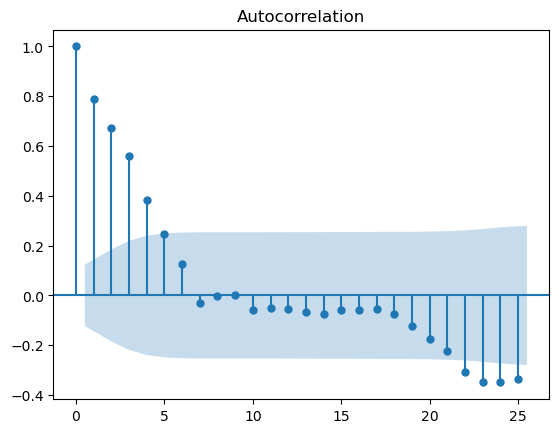

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=returns_weekly["2020"].adjClose)


In [25]:
df.head(20)

,adjClose,return_daily,return_weekly,return_biweekly
date,,,,
2010-01-04 00:00:00+00:00,23.906734,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,23.914459,0.000323,NaN,NaN
2010-01-06 00:00:00+00:00,23.767697,-0.006137,NaN,NaN
2010-01-07 00:00:00+00:00,23.522064,-0.010335,NaN,NaN
2010-01-08 00:00:00+00:00,23.682729,0.006830,NaN,NaN
2010-01-11 00:00:00+00:00,23.381481,-0.012720,NaN,NaN
2010-01-12 00:00:00+00:00,23.226995,-0.006607,NaN,NaN
2010-01-13 00:00:00+00:00,23.443276,0.009312,-0.019386,NaN
2010-01-14 00:00:00+00:00,23.914459,0.020099,0.000000,NaN


In [55]:
df.loc["2020-02-01" : "2020-02-11"]

,adjClose,return_daily,return_weekly,return_biweekly
date,,,,
2020-02-03 00:00:00+00:00,171.117986,0.024379,0.045945,0.067981
2020-02-04 00:00:00+00:00,176.750612,0.032917,0.091372,0.110960
2020-02-05 00:00:00+00:00,176.534727,-0.001221,0.108578,0.102464
2020-02-06 00:00:00+00:00,180.194952,0.020734,0.109815,0.105073
2020-02-07 00:00:00+00:00,180.450089,0.001416,0.094323,0.100479
2020-02-10 00:00:00+00:00,185.170111,0.026157,0.092140,0.133333
2020-02-11 00:00:00+00:00,180.989800,-0.022576,0.083475,0.113096


In [56]:
df.loc["2020-02-01" : "2020-02-11"].return_weekly.mean()

0.08937832663701675

In [57]:
df.loc["2020-02-01" : "2020-02-11"].return_biweekly.mean()

0.10476948890722938